<a href="https://colab.research.google.com/github/elabedimene/Neural-Network/blob/main/RN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [276]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [277]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [278]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
 

In [279]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
dataset = pd.read_csv("/content/drive/MyDrive/ML/Iris.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [280]:
dataset.tail(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
140,141,6.7,3.1,5.6,2.4,Iris-virginica
141,142,6.9,3.1,5.1,2.3,Iris-virginica
142,143,5.8,2.7,5.1,1.9,Iris-virginica
143,144,6.8,3.2,5.9,2.3,Iris-virginica
144,145,6.7,3.3,5.7,2.5,Iris-virginica
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [281]:
dataset.shape

(150, 6)

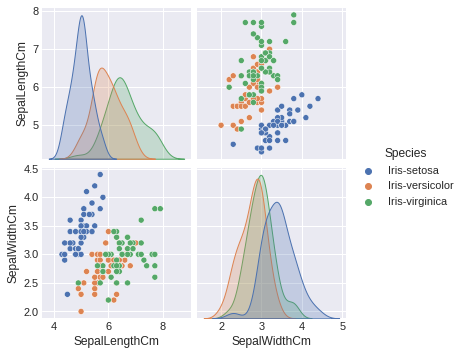

In [282]:
#4
sns.pairplot(data=dataset, vars=('SepalLengthCm','SepalWidthCm') , hue='Species')
plt.show()

In [283]:
#5
dataFrame = dataset.replace({'Species' : {'Iris-setosa':0, 'Iris-virginica':1, 'Iris-versicolor':2 }}, regex=True)


In [284]:
dataFrame.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
5,6,5.4,3.9,1.7,0.4,0
6,7,4.6,3.4,1.4,0.3,0
7,8,5.0,3.4,1.5,0.2,0
8,9,4.4,2.9,1.4,0.2,0
9,10,4.9,3.1,1.5,0.1,0


In [285]:
dataF=dataFrame['Species'] 
data=dataset.drop('Species',axis=1)
df=pd.concat([data,dataF],axis = 1)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [286]:
#7
y=df['Species'] 
x=df.drop('Species',axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
x_test= x_test.drop('Id',axis=1)
x_train = x_train.drop('Id',axis=1)

In [287]:
x_train.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
61,5.9,3.0,4.2,1.5
108,6.7,2.5,5.8,1.8
128,6.4,2.8,5.6,2.1
21,5.1,3.7,1.5,0.4
115,6.4,3.2,5.3,2.3
67,5.8,2.7,4.1,1.0
74,6.4,2.9,4.3,1.3
82,5.8,2.7,3.9,1.2
5,5.4,3.9,1.7,0.4
85,6.0,3.4,4.5,1.6


In [288]:
x_test.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
139,6.9,3.1,5.4,2.1
149,5.9,3.0,5.1,1.8
137,6.4,3.1,5.5,1.8
80,5.5,2.4,3.8,1.1
113,5.7,2.5,5.0,2.0
77,6.7,3.0,5.0,1.7
89,5.5,2.5,4.0,1.3
6,4.6,3.4,1.4,0.3
66,5.6,3.0,4.5,1.5
116,6.5,3.0,5.5,1.8


In [289]:
y_test.head()

139    1
149    1
137    1
80     2
113    1
Name: Species, dtype: int64

In [290]:
y_train.head()

61     2
108    1
128    1
21     0
115    1
Name: Species, dtype: int64

In [291]:
#9
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs',alpha=1e-05, epsilon=0.7, max_iter=150, random_state=0)
clf.fit(x_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, epsilon=0.7, max_iter=150, random_state=0,
              solver='lbfgs')

In [292]:
#10
from sklearn import metrics
%time
train_score = clf.score(x_train, y_train)
print("Le score train est {}".format(train_score))
test_score = clf.score(x_test, y_test)
print("Le score en test est {}".format(test_score))

pred=clf.predict(x_test)
print('the accuracy is :',metrics.accuracy_score(pred,y_test))

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.39 µs
Le score train est 1.0
Le score en test est 0.9777777777777777
the accuracy is : 0.9777777777777777


In [293]:
print("predict values " , pred)

predict values  [1 1 1 2 1 2 2 0 2 1 0 0 1 1 0 1 0 1 0 0 2 0 2 1 0 1 2 1 0 0 0 0 1 2 1 2 0
 0 1 1 0 1 1 0 2]


In [294]:
print("test values" , y_test.values)

test values [1 1 1 2 1 2 2 0 2 1 0 0 1 1 0 1 0 1 0 0 2 0 2 1 0 1 2 1 0 0 0 0 1 1 1 2 0
 0 1 1 0 1 1 0 2]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


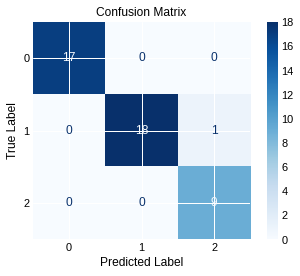

In [295]:
#11
color = 'black'
matrix = plot_confusion_matrix(clf, x_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()

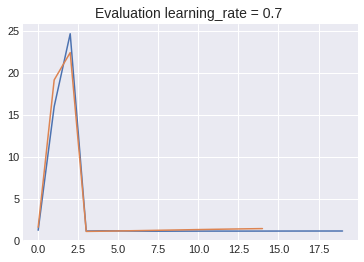

In [296]:
#13
clf = MLPClassifier(solver='sgd' , max_iter=150, random_state=0,learning_rate_init=0.7,verbose=0 )
clf.fit(x_train, y_train)

plt.title("Evaluation learning_rate = 0.7 ",fontsize=14)
plt.plot(clf.loss_curve_)
clf.fit(x_test, y_test)
plt.plot(clf.loss_curve_)


In [297]:
#14
params= [
    {
        "solver":"sgd",
        "learning_rate":"constant",
        "learning_rate_init":0.2,
        "max_iter":150,
    },
      {
        "solver":"sgd",
        "learning_rate":"constant",
        "learning_rate_init":0.7,
        "max_iter":300,
    },
  {
        "solver":"sgd",
        "learning_rate":"invscaling",
        "learning_rate_init":0.2,
        "max_iter":300,
    },
      {
        "solver":"sgd",
        "learning_rate":"invscaling",
        "learning_rate_init":0.7,
        "max_iter":150,
    },
    {
       "solver" :"adam",
       "learning_rate_init":0.01,
      "max_iter":300,

    },
]
labels= [
    "constant learning-rate_0.2",
    "constant learning-rate_0.7",
    "invscaling learning-rate_0.2",
    "invscaling learning-rate_0.7",
    "adam",

]
plot_args = [
    {"c":"red","linestyle":"-"},
    {"c":"green","linestyle":"-"},
    {"c":"blue","linestyle":"-"},
    {"c":"red","linestyle":"--"},
    {"c":"green","linestyle":"--"},
]


In [298]:
mlps=[]

for label,param in zip(labels,params):
  print("training:%s" % label)
  mlp=MLPClassifier(random_state=0,**param)
  mlp.fit(x_train,y_train)
  mlps.append(mlp)
  print("Training  score : %f" % mlp.score(x_train,y_train))


training:constant learning-rate_0.2
Training  score : 0.390476
training:constant learning-rate_0.7
Training  score : 0.390476
training:invscaling learning-rate_0.2
Training  score : 0.971429
training:invscaling learning-rate_0.7
Training  score : 0.961905
training:adam
Training  score : 0.990476


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [299]:
mlps2=[]
for label,param in zip(labels,params):
  print("training:%s" % label)
  mlp=MLPClassifier(random_state=0,**param)
  mlp.fit(x_test,y_test)
  mlps2.append(mlp)
  print("Training set score : %f" % mlp.score(x_test,y_test))

training:constant learning-rate_0.2
Training set score : 0.377778
training:constant learning-rate_0.7
Training set score : 0.422222
training:invscaling learning-rate_0.2
Training set score : 0.800000
training:invscaling learning-rate_0.7
Training set score : 0.800000
training:adam
Training set score : 1.000000


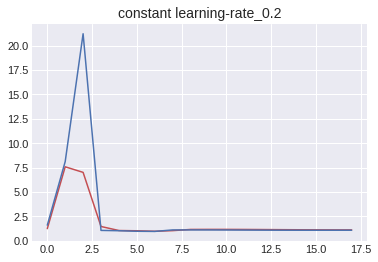

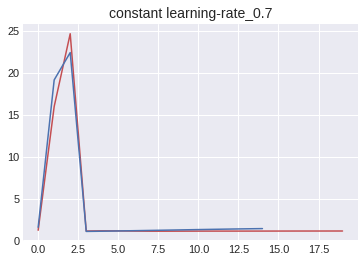

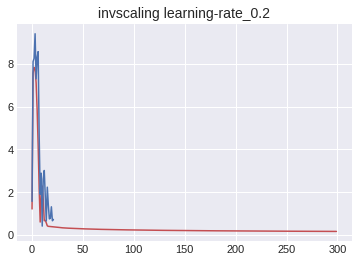

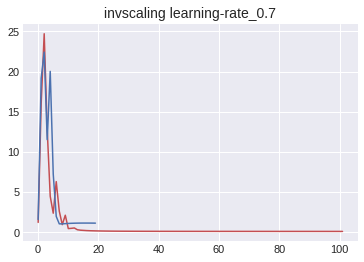

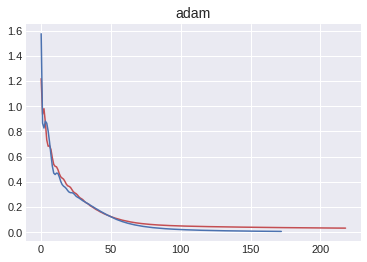

In [300]:
for mlp1, mlp2, label, args in zip(mlps, mlps2,labels,plot_args):
  plt.plot(mlp1.loss_curve_ , 'r', label=label)
  plt.plot(mlp2.loss_curve_ , 'b', label=label)
  plt.title(label,fontsize=14)

  plt.show()


15-
 si nous augmentons le nombre d’itérationsi 10 fois le réseau va s'entraîner trop longtemps, il pourrait causer le 'overfitting'.
Quand un tel événement se produit, le modèle prédictif pourra donner de très bonnes prédictions sur les données du Training Set  mais il prédira mal sur des données qu’il n’a pas encore vues lors de sa phase d’apprentissage.

#Recurrent Neural Network (RNN)

In [302]:
!pip install  tensorflow keras  


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [303]:
import keras 
from sklearn.preprocessing import normalize 
from keras.models import Sequential 
from keras.layers import Dense,Activation,Dropout 
#from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
)
from keras.utils import np_utils

In [304]:
dataR=df.iloc[np.random.permutation(len(data))]
print(dataR.head())


      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
66    67            5.6           3.0            4.5           1.5        2
100  101            6.3           3.3            6.0           2.5        1
67    68            5.8           2.7            4.1           1.0        2
106  107            4.9           2.5            4.5           1.7        1
33    34            5.5           4.2            1.4           0.2        0


In [307]:
X=dataR.iloc[:,1:5].values
y=dataR.iloc[:,5].values

print("Shape of X",X.shape)
print("Shape of y",y.shape)
print("Examples of X\n",X[:3])
print("Examples of y\n",y[:3])

Shape of X (150, 4)
Shape of y (150,)
Examples of X
 [[5.6 3.  4.5 1.5]
 [6.3 3.3 6.  2.5]
 [5.8 2.7 4.1 1. ]]
Examples of y
 [2 1 2]


In [308]:
#Normalization
X_normalized=normalize(X,axis=0)

In [309]:
total_length=len(data)
train_length=int(0.8*total_length)
test_length=int(0.2*total_length)

X_train=X_normalized[:train_length]
X_test=X_normalized[train_length:]
y_train=y[:train_length]
y_test=y[train_length:]

In [310]:
y_train=np_utils.to_categorical(y_train,num_classes=3)
y_test=np_utils.to_categorical(y_test,num_classes=3)
print("Shape of y_train",y_train.shape)
print("Shape of y_test",y_test.shape)


Shape of y_train (120, 3)
Shape of y_test (30, 3)


In [315]:
model=Sequential()
model.add(Dense(1000,input_dim=4,activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=20,epochs=10)


Epoch 1/10
6/6 [==============================] - 1s 33ms/step - loss: 1.0840 - accuracy: 0.5417 - val_loss: 1.0533 - val_accuracy: 0.6667
Epoch 2/10
6/6 [==============================] - 0s 8ms/step - loss: 1.0153 - accuracy: 0.6667 - val_loss: 0.9445 - val_accuracy: 0.6667
Epoch 3/10
6/6 [==============================] - 0s 9ms/step - loss: 0.8717 - accuracy: 0.6667 - val_loss: 0.7545 - val_accuracy: 0.6667
Epoch 4/10
6/6 [==============================] - 0s 10ms/step - loss: 0.6609 - accuracy: 0.7000 - val_loss: 0.5253 - val_accuracy: 0.7333
Epoch 5/10
6/6 [==============================] - 0s 11ms/step - loss: 0.4959 - accuracy: 0.7667 - val_loss: 0.3678 - val_accuracy: 0.8667
Epoch 6/10
6/6 [==============================] - 0s 10ms/step - loss: 0.3440 - accuracy: 0.9583 - val_loss: 0.2662 - val_accuracy: 0.9667
Epoch 7/10
6/6 [==============================] - 0s 10ms/step - loss: 0.2903 - accuracy: 0.9167 - val_loss: 0.2162 - val_accuracy: 0.9333
Epoch 8/10
6/6 [=============

In [316]:
prediction=model.predict(X_test)
length=len(prediction)
y_label=np.argmax(y_test,axis=1)
predict_label=np.argmax(prediction,axis=1)
accuracy=np.sum(y_label==predict_label)/length * 100 
print("Accuracy =",accuracy )

1/1 [==============================] - 0s 51ms/step
Accuracy = 96.66666666666667


#17
**Non dans notre cas de base de donnée Iris,il n'est pas intéressant d’avoir un réseau de neurones récurrent 
car pour les RNN Les valeurs d'une action dépendent largement des valeurs qu'elle avait précédemment ; les données sont des séquences et  les données à un instant t dépendent des données à l'instant t-1.**
